In [1]:
import random
import matplotlib.pyplot as plt

In [34]:
def sexual_reproduction(optimum: list, population: int=1000):
    
    # Creates lists to hold various things
    rc = []
    popchar = []
    avefit = []
    characters = len(optimum)
    #creating a list of lists of random characters
    for j in range(population):
        for i in range(characters):
            numb = random.randint(32, 122)
            char = chr(numb)
            rc.append(char)
        popchar.append(rc)
        rc = []

    #calculate fitness
    fitness = []
    for x in range(population):
        count = 0
        for y in range(characters):
            if popchar[x][y] == optimum[y]:
                count += 1
        fitness.append(count)


    check = 0
    counter = 0

    while check < 1:

        #get two random members of population
        a = random.randint(0, (population - 1))
        b = random.randint(0, (population - 1))
        membera = popchar[a]
        memberb = popchar[b]
        fitnessmembera = fitness[a]
        fitnessmemberb = fitness[b]

        #see which is fitter and select as parent a
        parenta = []
        if fitnessmembera > fitnessmemberb:
            parenta = parenta + membera
        else:
            parenta = parenta + memberb

        #find another 2 random members
        c = random.randint(0, (population - 1))
        d = random.randint(0, (population - 1))
        memberc = popchar[c]
        memberd = popchar[d]
        fitnessmemberc = fitness[c]
        fitnessmemberd = fitness[d]

        #see which is fitter and select as parent b
        parentb = []
        if fitnessmemberc > fitnessmemberd:
            parentb = parentb + memberc
        else:
            parentb = parentb + memberd

        #crossover
        child = []
        for y in range(characters):
            numb2 = random.random()
            if numb2 < 0.5:
                child.append(parenta[y])
            else:
                child.append(parentb[y])

        #mutate that child
        for y in range(characters):
            numb2 = random.random()
            if numb2 < (1. / len(optimum)):
                child[y] = chr(random.randint(32, 122))
            else:
                child[y] = child[y]

        #calculate fitness of child
        fitchild = 0
        fit = 0
        for y in range(characters):
            if child[y] == optimum[y]:
                fit += 1
        fitchild = fitchild + fit

        #find another 2 random members
        e = random.randint(0, (population - 1))
        f = random.randint(0, (population - 1))
        membere = popchar[e]
        memberf = popchar[f]
        fitnessmembere = fitness[e]
        fitnessmemberf = fitness[f]

        #replace weaker of the two members with the child
        if fitnessmembere > fitnessmemberf:
            popchar[f] = child
            fitness[f] = fitchild
        else:
            popchar[e] = child
            fitness[e] = fitchild
            #
    #    for i in range(population):
    #        numb3 = random.random()
    #        if fitness[i] < (sum(fitness)/len(fitness)) and numb3 < 0.5:
    #            del popchar[i]
    #    populationpopnum = len(popchar)

        #checks to see if optimum fitness has been reached
        for i in range(population):
            if fitness[i] == len(optimum):
                check += 1
                print(popchar[i])

        counter = counter + 1
    #
        avefit.append((sum(fitness)/len(fitness)))

    return counter, avefit

In [35]:
s_generations, s_avefit = sexual_reproduction(optimum=list('Hello Joe, How are you?'), population=1000)

['H', 'e', 'l', 'l', 'o', ' ', 'J', 'o', 'e', ',', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', '?']


In [36]:
s_generations

12957

In [31]:
def asexual_reproduction(optimum: list, population: int=1000):
    
    popchar = []
    avefit = []
    rc = []

    characters = len(optimum)
    #creating the population - a list of fairly similar genetic codes
    for j in range(population):
        for i in range(characters):
            numb = random.randint(32, 122)
            char = chr(numb)
            rc.append(char)
        popchar.append(rc)
        rc = []
    
    #calculate fitness - how well adapted that individual is to the 
    #environment (how close it is to the optimum sentence)
    fitness = []
    for x in range(population):
        count = 0
        for y in range(characters):
            if popchar[x][y] == optimum[y]:
                count += 1
        fitness.append(count)
    check = 0
    counter = 0

    while check < 1:
        #get two random members of population
        a = random.randint(0, (population-1))
        b = random.randint(0, (population-1))
        membera = popchar[a]
        memberb = popchar[b]
        fitnessmembera = fitness[a]
        fitnessmemberb = fitness[b]
        parenta = []
        #see which is fitter and select as parent to mutate
        if fitnessmembera > fitnessmemberb:
            parenta = parenta + membera
        else:
            parenta = parenta + memberb
        #mutate that parent
        for y in range(characters):
            numb2 = random.random()
            if numb2 < (1. / len(optimum)):
                parenta[y] = chr(random.randint(32, 122))
            else:
                parenta[y] = parenta[y]
    
        child = parenta[:]

        #calculate fitness of child
        fitchild = 0
        fit = 0
        for y in range(characters):
            if child[y] == optimum[y]:
                fit += 1
        fitchild = fitchild + fit

        #find another 2 random members
        c = random.randint(0, (population-1))
        d = random.randint(0, (population-1))
        memberc = popchar[c]
        memberd = popchar[d]
        fitnessmemberc = fitness[c]
        fitnessmemberd = fitness[d]

        #replace weaker of the two members with the child
        if fitnessmemberc > fitnessmemberd:
            popchar[d] = child
            fitness[d] = fitchild
        else:
            popchar[c] = child
            fitness[c] = fitchild

        #checks to see if optimum fitness has been reached
        for i in range(population):
            if fitness[i] == len(optimum):
                check += 1
                print(popchar[i])

        counter = counter + 1
    
        avefit.append((sum(fitness)/len(fitness)))
    
    
    return counter, avefit

In [32]:
as_generations, as_avefit = asexual_reproduction(optimum=list('Hello Joe, How are you?'), population=1000)

['H', 'e', 'l', 'l', 'o', ' ', 'J', 'o', 'e', ',', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', '?']


In [33]:
as_generations

89723

In [49]:
def plot_avefitness(sexual: list, asexual):
    fig, ax = plt.subplots(1, figsize=(6,6))
    labels = ['sexual', 'asexual']
    for av, lab in zip([sexual, asexual], labels):
        ax.plot(range(len(av)), av, label=lab)
        
    ax.set_xlabel('Generations', fontsize=14)
    ax.set_ylabel('Fitness', fontsize=14)
    ax.legend(loc=4,fontsize=12)
    
    
    


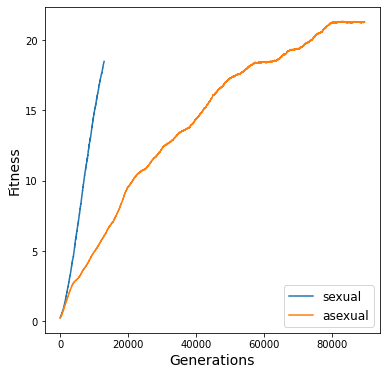

In [50]:
plot_avefitness(s_avefit, as_avefit)